# 4 Agrupación alternativa para el perfil de las estaciones utilizando consensus clustering (Datos no normalizados)

In [2]:
%%HTML
<b>Sección anterior: </b>
<a href="http://nbviewer.jupyter.org/github/jaircastruita/visualizations/blob/master/ECOBICI_analysis_consensus_cluster.ipynb">
Análisis de frecuencia de rango con uso de consensus clustering.</a>

<b>Siguiente sección: </b>
<a href="http://nbviewer.jupyter.org/github/jaircastruita/visualizations/blob/master/ECOBICI_analysis_cluster_in_out%20_PCA.ipynb">
Agrupando estaciones por actividad: Definiendo perfiles de las estaciones en Ecobici.</a>

Anteriormente se realizó un análisis de diversidad de rango y en el sistema a lo largo del tiempo transcurrido que ha estado en funcionamiento además de un gráfico en donde se aprecia la frecuencia de los diferentes rangos donde está presente una estación.
Esta vez se realizará un análisis tomando un enfoque diferente: haciendo uso de datos no normalizados.

Como se ha explicado anteriormente consensus clustering es una herramienta de agrupación que utiliza boosting con el objetivo de reducir la variabilidad en las observaciones tomando muestras de las características y de las observaciones diferentes en cada iteración y realizando una votación entre todos los elementos agrupados en sus respectivos clusters almacenándolos en una matriz llamada matriz de consenso, variando el número de clusters y estableciendo una medida de evaluación basada en dicha matriz.

A continuación es utiliza esta técnica utilizando cada estación como una observación y la frecuencia de aparición de cada estación en un determinado rango como el vector de características.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

In [2]:
def plot_freqHeatmap(data):
    
    fig, ax = plt.subplots(1, 1, figsize=(16, 10), sharey=True)
    ax.set_title('Station over rank frequency')
    
    yticks = data.index
    keptticks = yticks[::int(len(yticks)/10)]
    yticks = ['' for y in yticks]
    yticks[::int(len(yticks)/10)] = keptticks
    
    xticks = data.columns
    keptticks = xticks[::int(len(xticks)/10)]
    xticks = ['' for y in xticks]
    xticks[::int(len(xticks)/10)] = keptticks

    sns.heatmap(data, ax=ax, yticklabels=yticks, xticklabels=xticks)
    
    #This sets the yticks "upright" with 0, as opposed to sideways with 90.
    plt.yticks(rotation=0) 

    plt.show()

Se realiza esta técnica haciendo la previa separación entre la fase 1 y la fase 2 y 3 juntas, debido a que, como anteriormente se ha mostrado, entraron en funcionamiento en un periodo de tiempo muy cercano la una de la otra, imposibilitando la estabilización del uso entre los usuarios del sistema.

In [3]:
k_3 = pd.read_csv('fase 1\cluster_member3.csv')
k_6 = pd.read_csv('fase 1\cluster_member6.csv')
res = pd.read_csv('phase1_no_normalized.csv').T

# Consensus clustering con 3 clusters

Es evidente que hay que seleccionar aquel clustering que tenga la mayor ganancia de información con el menor número de clusters utilizados, como se realizó en el notebook anterior esto se decide con la técnica PAC (https://en.wikipedia.org/wiki/Consensus_clustering#Over-interpretation_potential_of_consensus_clustering), que muestra la ganancia de información obtenida del consensus clustering. Esta vez se utilizó el conjunto de datos no normalizado, sometiéndolo a una clusterización con 3 y 6 clusters. El siguiente heatmap muestra los clusters 1, 2 y 3 ordenados. Puede verse como las similitudes de los los elementos en el mismo cluster agrupa a aquellos cuyas densidades están más concentradas en una región del rango. En el caso del body, es el cluster resultante de mayor tamaño, ya que la gran mayoría de los elementos tienen un elevado valor de variabilidad, interpretándose esto como una falta de estabilidad en el uso de esa estación en el tiempo.

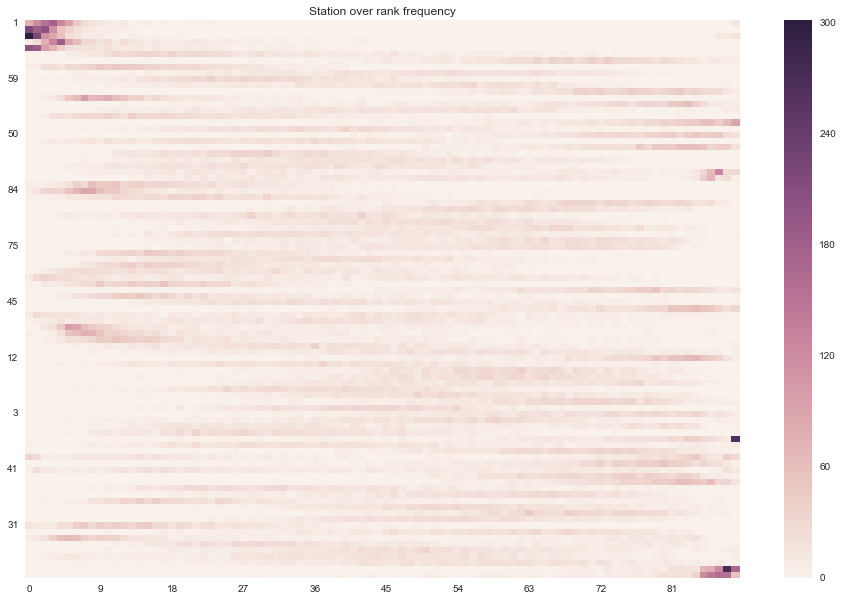

In [4]:
res['cluster'] = k_3.values
temp_res = res.sort_values(['cluster'])
plot_freqHeatmap(temp_res[temp_res.columns.difference(['cluster'])])

Para 6 clusters no queda tan clara la separación en los elemenos, pero aún así puede apreciarse que los elementos con mayor concenctración en los extremos siguen agrupándose.

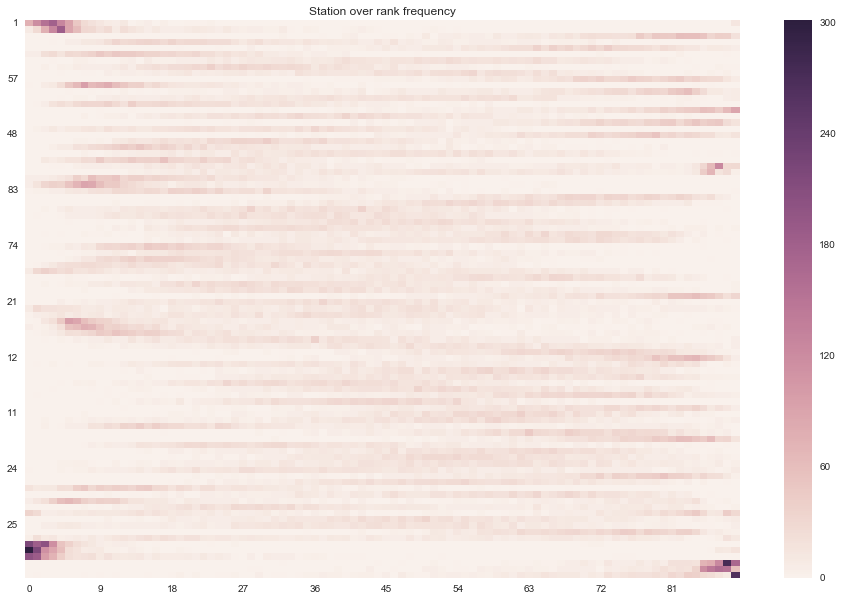

In [5]:
res2 = pd.read_csv('phase1_no_normalized.csv').T
res2['cluster'] = k_6.values
temp_res = res2.sort_values(['cluster'])
plot_freqHeatmap(temp_res[temp_res.columns.difference(['cluster'])])

# Clustering para la fase 2 y 3

De igual manera como se realizó para la fase 1, la fase 2 y 3 también se presentan los heatmaps para la expansión de esta fase:

In [6]:
k_3 = pd.read_csv('fase 3\cluster_member3.csv')
k_6 = pd.read_csv('fase 3\cluster_member6.csv')
res = pd.read_csv('phase3_no_normalized.csv').T

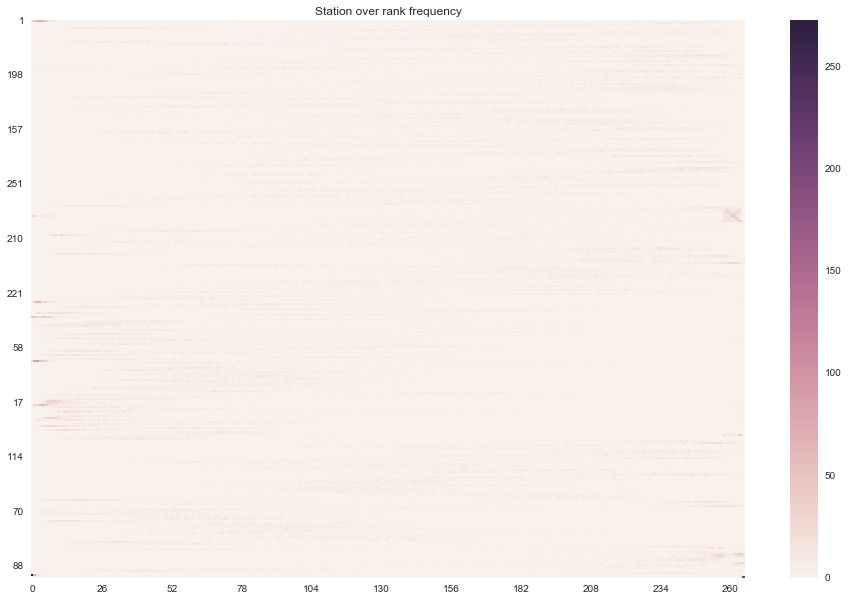

In [7]:
res['cluster'] = k_3.values
temp_res = res.sort_values(['cluster'])
plot_freqHeatmap(temp_res[temp_res.columns.difference(['cluster'])])

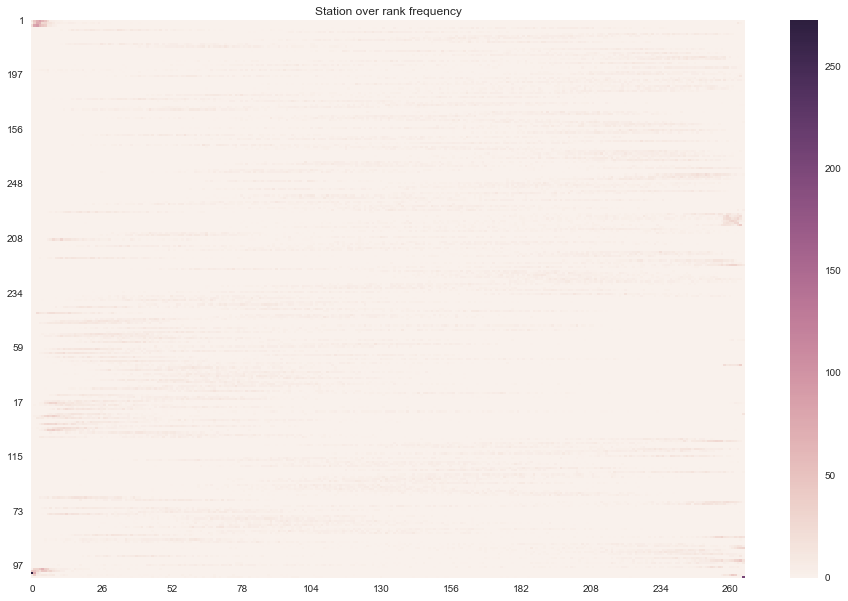

In [8]:
res2 = pd.read_csv('phase3_no_normalized.csv').T
res2['cluster'] = k_6.values
temp_res = res2.sort_values(['cluster'])
plot_freqHeatmap(temp_res[temp_res.columns.difference(['cluster'])])

Al introducir nuevas estaciones en el sistema el número de características también escala, aunque es difícilmente apreciable los conjuntos que los clusters formaron con estas características a simple vista. Cabe hacer notar que el subconjunto de estaciones que están más inclinados a mayor frecuencia en los extremos del heatmap corresponden a las estaciones que tuvieron menor variabilidad en el gráfico de frecuencia de rango.

# Conclusiones

Lo que se realizó en este notebook ilustra de una forma diferente lo que se apreció en el gráfico de estación contra variabilidad anteriormente mostrado. Las estaciones cuya mayor actividad se concentran en los extremos (más utilizados o menos utilizados) son mucho menores en cantidad en comparación con las estaciones con variabilidad más dispersa entre los rangos.

En el siguiente notebook se realizará algo más de EDA, esta vez utilizando una técnica de cluster más tradicional: Mixture models, con el objetivo de agrupar las estaciones de acuerdo a su actividad a lo largo del día.

In [3]:
from IPython.display import HTML

#To hide code from the nbviewer render
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')